<a href="https://colab.research.google.com/github/Papaxristos/AgroPredict-AI/blob/main/AgroPredict_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from google.colab import drive
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# Ορισμός της διαδρομής των δεδομένων
base_path = '/content/drive/My Drive/Python Projects/AgroPredict AI/'

# Διαδρομές των αρχείων
crop_data_path = os.path.join(base_path, 'crop.csv')
soil_data_path = os.path.join(base_path, 'SOIL DATA GR.xlsx')
weather_data_path = os.path.join(base_path, 'weather.csv')

# Έλεγχος των διαδρομών
print(crop_data_path)
print(soil_data_path)
print(weather_data_path)

# Φόρτωμα δεδομένων καλλιεργειών
crop_data = pd.read_csv(crop_data_path)
print("Καλλιεργητικά Δεδομένα:")
display(crop_data)  # Εμφάνιση όλων των δεδομένων

# Φόρτωμα δεδομένων εδάφους από Excel
soil_data = pd.read_excel(soil_data_path)
print("Δεδομένα Εδάφους:")
display(soil_data)  # Εμφάνιση όλων των δεδομένων

# Φόρτωμα περιβαλλοντικών δεδομένων
weather_data = pd.read_csv(weather_data_path)
print("Περιβαλλοντικά Δεδομένα:")
display(weather_data)  # Εμφάνιση όλων των δεδομένων


Mounted at /content/drive
/content/drive/My Drive/Python Projects/AgroPredict AI/crop.csv
/content/drive/My Drive/Python Projects/AgroPredict AI/SOIL DATA GR.xlsx
/content/drive/My Drive/Python Projects/AgroPredict AI/weather.csv
Καλλιεργητικά Δεδομένα:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Δεδομένα Εδάφους:


,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,2,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.580,1.684,0.41
2,3,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.000,1.840,0.46
3,4,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
4,5,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,777,26.0,46.0,28.0,6.720,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
777,778,40.0,28.0,32.0,7.790,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
778,779,34.0,28.0,38.0,7.630,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
779,780,16.0,38.0,46.0,7.730,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


Περιβαλλοντικά Δεδομένα:


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16


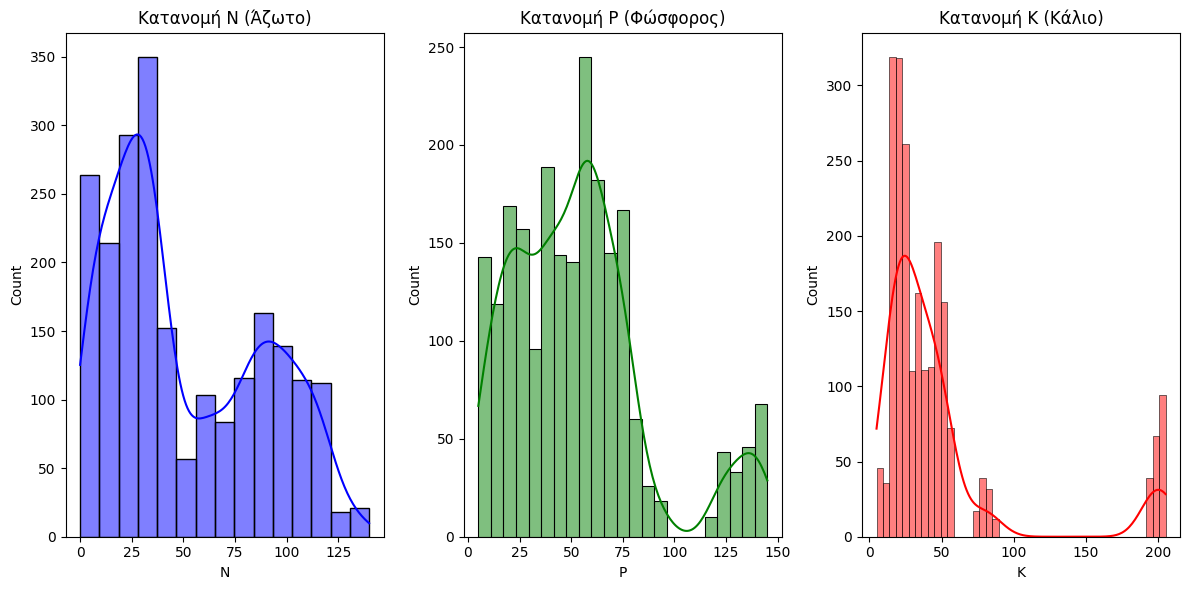

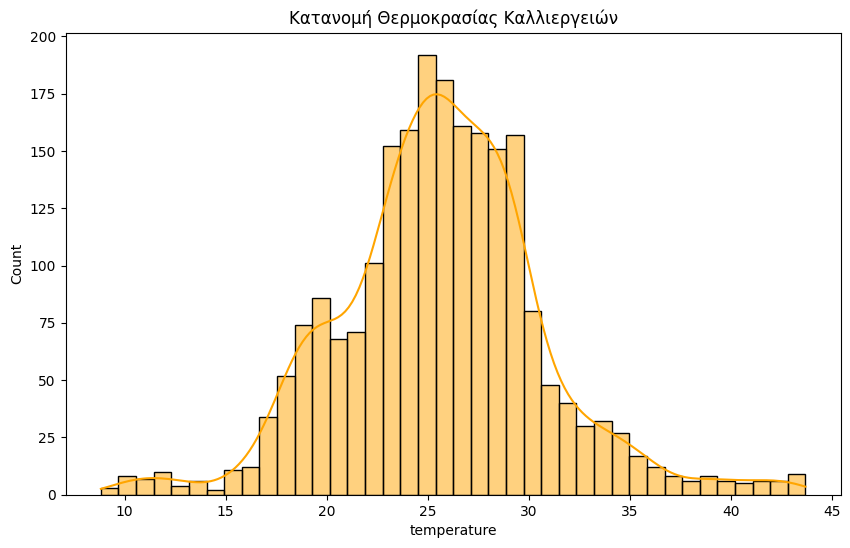

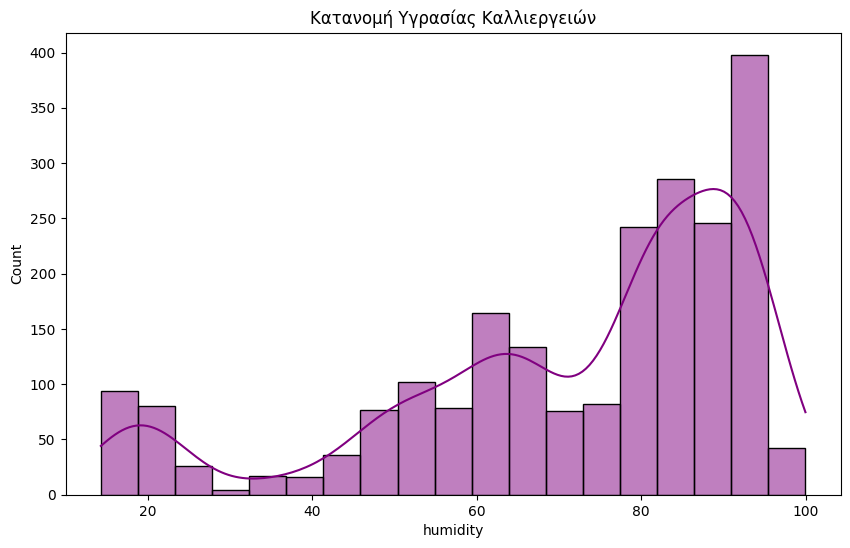

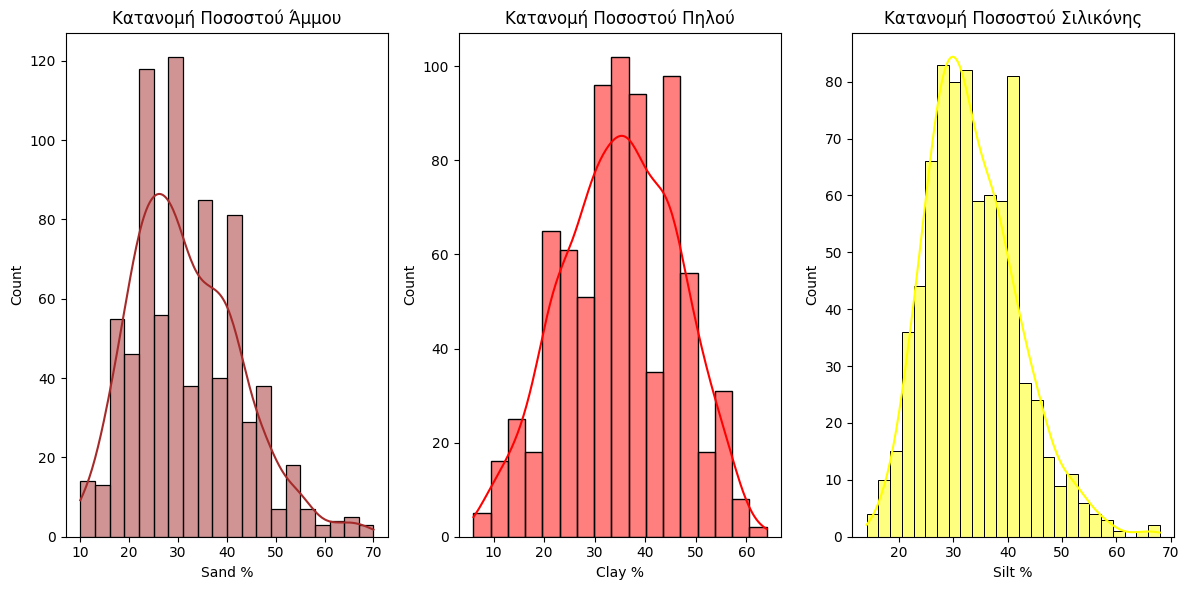

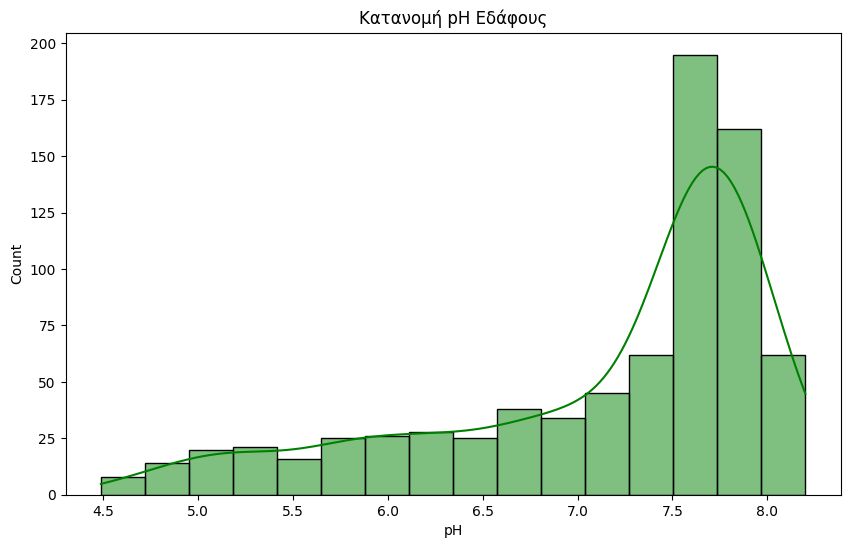

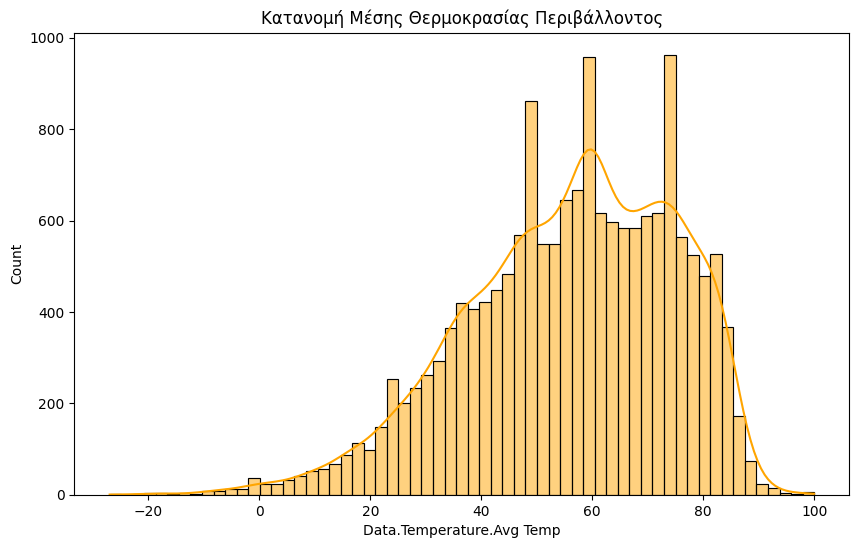

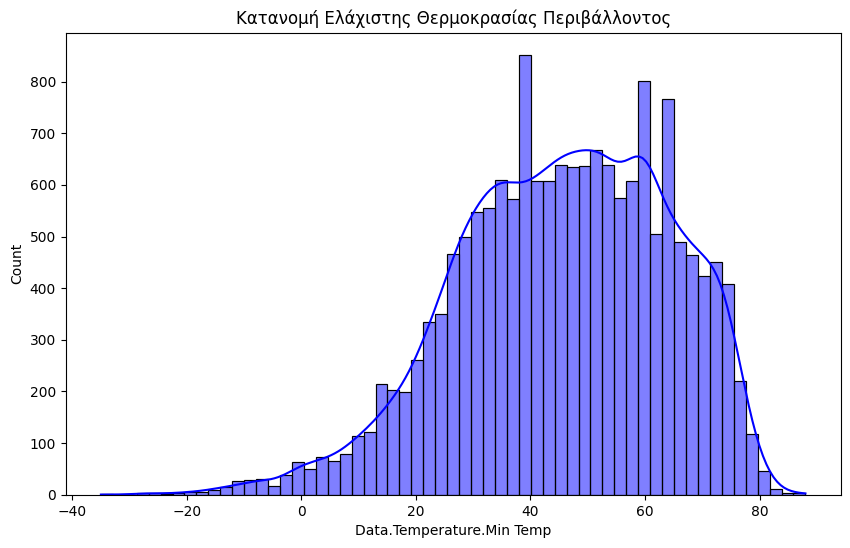

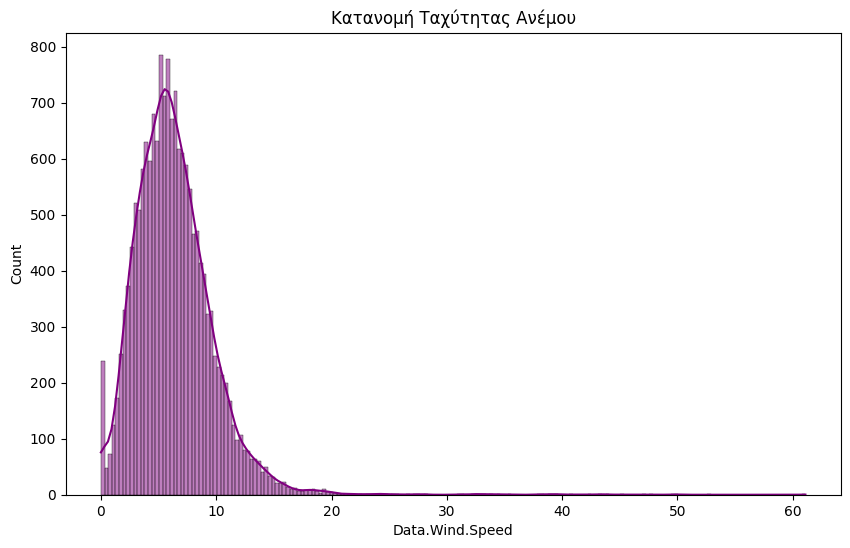

In [2]:
# Καλλιεργητικά δεδομένα - Οπτικοποίηση N, P, K
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(crop_data['N'], kde=True, color='blue')
plt.title('Κατανομή Ν (Άζωτο)')
plt.subplot(1, 3, 2)
sns.histplot(crop_data['P'], kde=True, color='green')
plt.title('Κατανομή P (Φώσφορος)')
plt.subplot(1, 3, 3)
sns.histplot(crop_data['K'], kde=True, color='red')
plt.title('Κατανομή K (Κάλιο)')
plt.tight_layout()
plt.show()

# Καλλιεργητικά δεδομένα - Οπτικοποίηση άλλων χαρακτηριστικών
plt.figure(figsize=(10, 6))
sns.histplot(crop_data['temperature'], kde=True, color='orange')
plt.title('Κατανομή Θερμοκρασίας Καλλιεργειών')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(crop_data['humidity'], kde=True, color='purple')
plt.title('Κατανομή Υγρασίας Καλλιεργειών')
plt.show()

# Δεδομένα εδάφους - Οπτικοποίηση ποσοστών άμμου, πηλού και σιλικόνης
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(soil_data['Sand %'], kde=True, color='brown')
plt.title('Κατανομή Ποσοστού Άμμου')
plt.subplot(1, 3, 2)
sns.histplot(soil_data['Clay %'], kde=True, color='red')
plt.title('Κατανομή Ποσοστού Πηλού')
plt.subplot(1, 3, 3)
sns.histplot(soil_data['Silt %'], kde=True, color='yellow')
plt.title('Κατανομή Ποσοστού Σιλικόνης')
plt.tight_layout()
plt.show()

# Δεδομένα εδάφους - Κατανομή pH
plt.figure(figsize=(10, 6))
sns.histplot(soil_data['pH'], kde=True, color='green')
plt.title('Κατανομή pH Εδάφους')
plt.show()

# Περιβαλλοντικά δεδομένα - Θερμοκρασία
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Data.Temperature.Avg Temp'], kde=True, color='orange')
plt.title('Κατανομή Μέσης Θερμοκρασίας Περιβάλλοντος')
plt.show()

# Περιβαλλοντικά δεδομένα - Υγρασία
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Data.Temperature.Min Temp'], kde=True, color='blue')
plt.title('Κατανομή Ελάχιστης Θερμοκρασίας Περιβάλλοντος')
plt.show()

# Περιβαλλοντικά δεδομένα - Ταχύτητα Ανέμου
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['Data.Wind.Speed'], kde=True, color='purple')
plt.title('Κατανομή Ταχύτητας Ανέμου')
plt.show()

# Pairplot για τις συσχετίσεις των χαρακτηριστικών
sns.pairplot(crop_data)
plt.title("Pairplot για τα Καλλιεργητικά Δεδομένα")
plt.savefig('/content/drive/My Drive/Python Projects/AgroPredict AI/pairplot_crop_data.png')
plt.close()

# Boxplot για ενδεχόμενα outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=crop_data[['N', 'P', 'K']])
plt.title('Boxplot για τα Καλλιεργητικά Δεδομένα')
plt.savefig('/content/drive/My Drive/Python Projects/AgroPredict AI/boxplot_crop_data.png')
plt.close()


In [3]:
from google.colab import drive

# Σύνδεση με το Google Drive
drive.mount('/content/drive')

# Φόρτωση δεδομένων από το Google Drive
crop_data_path = '/content/drive/My Drive/Python Projects/AgroPredict AI/crop.csv'
soil_data_path = '/content/drive/My Drive/Python Projects/AgroPredict AI/SOIL DATA GR.xlsx'
weather_data_path = '/content/drive/My Drive/Python Projects/AgroPredict AI/weather.csv'

# Ανάγνωση των δεδομένων από τα αρχεία
crop_data = pd.read_csv(crop_data_path, encoding='latin1')  # Αν χρειαστεί να προσαρμόσετε την κωδικοποίηση
soil_data = pd.read_excel(soil_data_path)
weather_data = pd.read_csv(weather_data_path)

# Συνάρτηση για καθαρισμό outliers με IQR
def remove_outliers(df):
    # Ορισμός των αριθμητικών στηλών
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Εφαρμογή της μεθόδου IQR για κάθε αριθμητική στήλη
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Αφαίρεση outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Καθαρισμός των δεδομένων καλλιεργειών
cleaned_crop_data = remove_outliers(crop_data)
print("Καλλιεργητικά δεδομένα μετά τον καθαρισμό:")
print(cleaned_crop_data.head())

# Καθαρισμός των δεδομένων εδάφους
cleaned_soil_data = remove_outliers(soil_data)
print("\nΔεδομένα εδάφους μετά τον καθαρισμό:")
print(cleaned_soil_data.head())

# Καθαρισμός των περιβαλλοντικών δεδομένων
cleaned_weather_data = remove_outliers(weather_data)
print("\nΠεριβαλλοντικά δεδομένα μετά τον καθαρισμό:")
print(cleaned_weather_data.head())

# Αποθήκευση των καθαρισμένων δεδομένων στο Google Drive
cleaned_crop_data.to_csv('/content/drive/My Drive/Python Projects/AgroPredict AI/cleaned_crop_data.csv', index=False)
cleaned_soil_data.to_csv('/content/drive/My Drive/Python Projects/AgroPredict AI/cleaned_soil_data.csv', index=False)
cleaned_weather_data.to_csv('/content/drive/My Drive/Python Projects/AgroPredict AI/cleaned_weather_data.csv', index=False)

print("\nΤα καθαρισμένα δεδομένα αποθηκεύτηκαν επιτυχώς στο Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Καλλιεργητικά δεδομένα μετά τον καθαρισμό:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice

Δεδομένα εδάφους μετά τον καθαρισμό:
    ID  Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
4    5    33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   
9   10    31.2    32.8    36.0  7.551     0.483  2.467117     8.71   9.032258   
10  11    29.6    44.8    25.6  7.502     0.445  2.737898     6.95   6.702509   
13  14    51.6    20.8    27.6  7.794     0.448  1.064320    15.67   4

In [ ]:
ΜΟΝΤΕΛΑ ΠΡΟΒΛΕΨΗΣ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  2016-01-03           1             3       2016   
1                0.00  2016-01-03           1             3       2016   
2                0.16  2016-01-03           1             3       2016   
3                0.00  2016-01-03           1             3       2016   
4                0.01  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Te

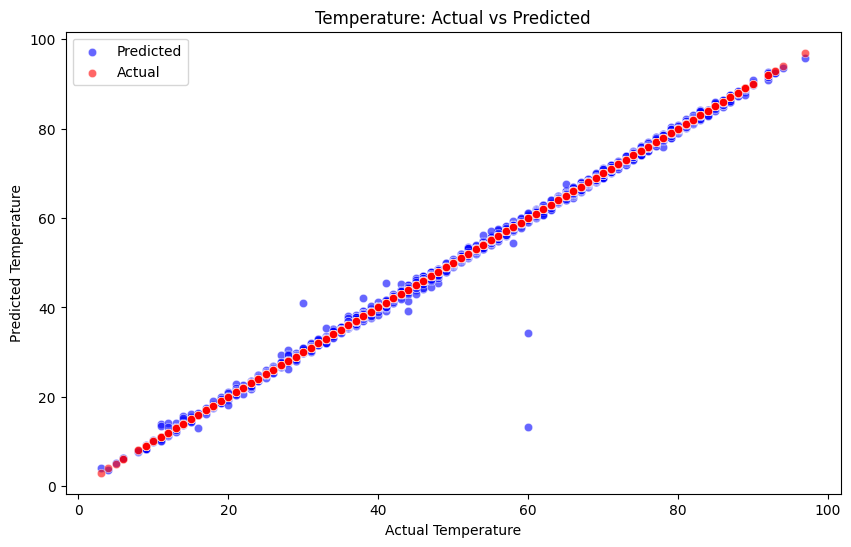

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Φόρτωση των δεδομένων
data_weather = pd.read_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/cleaned_weather_data.csv')

# Εξετάζουμε τα πρώτα δεδομένα για να δούμε ποια είναι τα χαρακτηριστικά και ο στόχος
print(data_weather.head())

# Αν οι ημερομηνίες είναι σε μορφή string, ας τις αφαιρέσουμε ή να τις μετατρέψουμε
# Μετατροπή της στήλης Date.Full σε pandas datetime αν θέλεις να εξαγάγεις χαρακτηριστικά από την ημερομηνία
data_weather['Date.Full'] = pd.to_datetime(data_weather['Date.Full'], errors='coerce')

# Δημιουργία νέων χαρακτηριστικών από την ημερομηνία (έτος, μήνας, ημέρα κλπ.)
data_weather['Year'] = data_weather['Date.Full'].dt.year
data_weather['Month'] = data_weather['Date.Full'].dt.month
data_weather['Day'] = data_weather['Date.Full'].dt.day

# Αφαιρούμε τη στήλη 'Date.Full' και άλλες στήλες που δεν είναι χρήσιμες
data_weather = data_weather.drop(columns=['Date.Full', 'Station.City'])  # Αφαιρούμε τις στήλες που δεν είναι χρήσιμες για το μοντέλο

# Κωδικοποίηση κατηγορηματικών στηλών (π.χ., Station.State, Station.Code)
label_encoder = LabelEncoder()

categorical_columns = data_weather.select_dtypes(include=['object']).columns  # Βρίσκουμε τις κατηγορηματικές στήλες
for col in categorical_columns:
    data_weather[col] = label_encoder.fit_transform(data_weather[col].astype(str))

# Ορίζουμε τα χαρακτηριστικά και τον στόχο (χωρίς τις ημερομηνίες και τις στήλες στόχους)
X = data_weather.drop(columns=['Data.Temperature.Avg Temp'])  # Αφαιρούμε τη στήλη στόχο
Y = data_weather['Data.Temperature.Avg Temp']  # Ο στόχος είναι η μέση θερμοκρασία

# Σπαταλάμε τα δεδομένα σε train και test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Προχωράμε στην εκπαίδευση και αξιολόγηση του μοντέλου
model_water = RandomForestRegressor(n_estimators=100, random_state=42)
model_water.fit(X_train, Y_train)

# Πρόβλεψη και αξιολόγηση
Y_pred_water = model_water.predict(X_test)

# Υπολογισμός του MSE και R² (Ακρίβεια)
mse_water = mean_squared_error(Y_test, Y_pred_water)
mae_water = mean_absolute_error(Y_test, Y_pred_water)
r2 = r2_score(Y_test, Y_pred_water)

# Εκτύπωση αποτελεσμάτων
print(f'Mean Squared Error (Temperature): {mse_water}')
print(f'Mean Absolute Error (Temperature): {mae_water}')
print(f'R² (R-squared) Score: {r2}')

# Visualization of predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred_water, color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test, y=Y_test, color='red', label='Actual', alpha=0.6)

plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Temperature: Actual vs Predicted')
plt.legend()
plt.show()


Mounted at /content/drive
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
3  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
4  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
Αξιολόγηση για Άζωτο (N):
Mean Squared Error: 192.55358538829967
Mean Absolute Error: 11.12567760879929
R² Score: 0.8695292472839355

Αξιολόγηση για Φώσφορο (P):
Mean Squared Error: 108.94992083432432
Mean Absolute Error: 8.225278960047541
R² Score: 0.7975879311561584

Αξιολόγηση για Κάλιο (K):
Mean Squared Error: 33.48712630515424
Mean Absolute Error: 4.227459341448706
R² Score: 0.8872118592262268



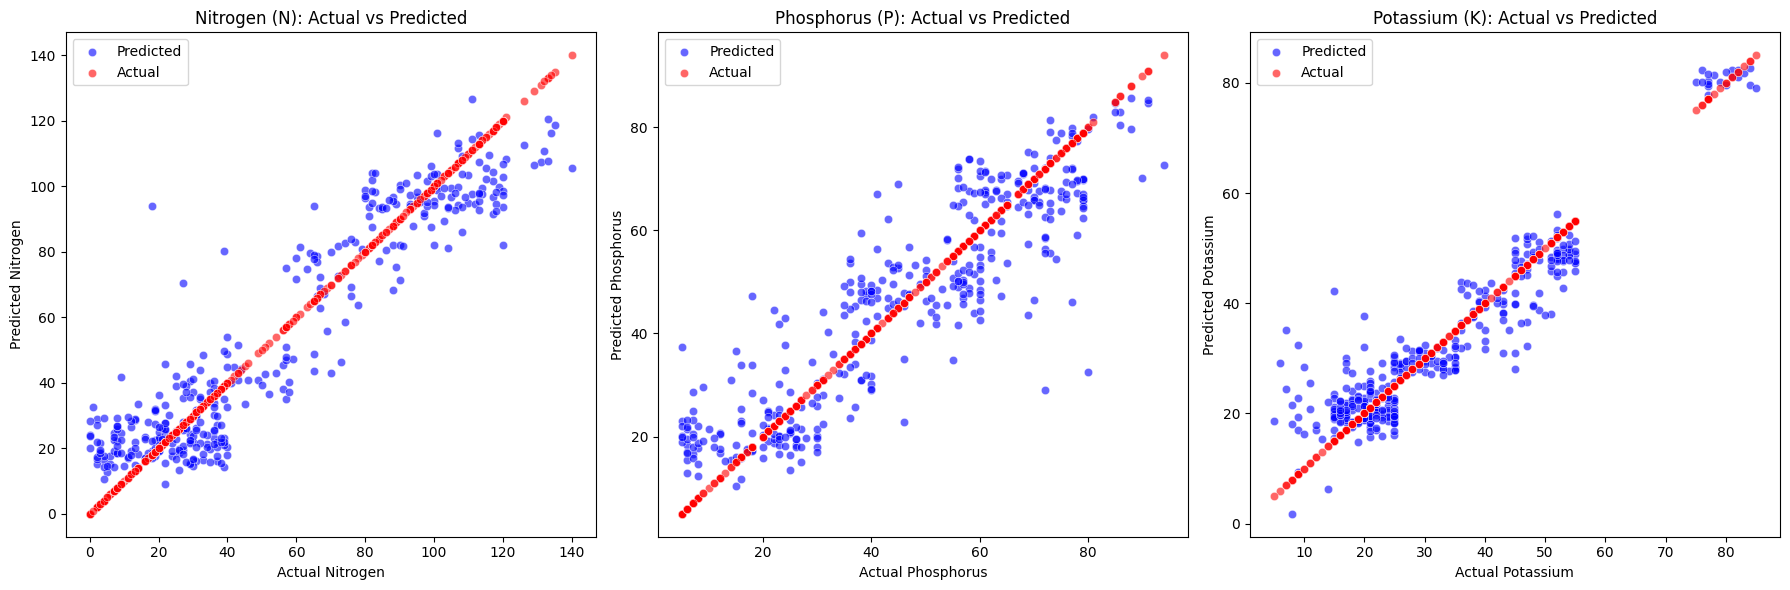

In [5]:
# Μαount του Google Drive
from google.colab import drive
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Μαount του Google Drive
drive.mount('/content/drive')

# Βεβαιωθείτε ότι το αρχείο υπάρχει στο σωστό path
path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/cleaned_crop_data.csv'

# Ελέγξτε αν το αρχείο υπάρχει
if not os.path.exists(path):
    raise FileNotFoundError(f"The file {path} was not found on your Google Drive.")

# Φόρτωση των δεδομένων από το Google Drive
data_crop = pd.read_csv(path)

# Εμφάνιση των πρώτων γραμμών για έλεγχο
print(data_crop.head())

# 1. Προετοιμασία δεδομένων
X_nutrients = data_crop[['temperature', 'humidity', 'ph', 'rainfall']]  # Χαρακτηριστικά
Y_nitrogen = data_crop['N']  # Στόχος για το άζωτο
Y_phosphorus = data_crop['P']  # Στόχος για το φώσφορο
Y_potassium = data_crop['K']  # Στόχος για το κάλιο

# Διαίρεση σε train και test
X_train, X_test, Y_train_nitrogen, Y_test_nitrogen = train_test_split(X_nutrients, Y_nitrogen, test_size=0.2, random_state=42)
_, _, Y_train_phosphorus, Y_test_phosphorus = train_test_split(X_nutrients, Y_phosphorus, test_size=0.2, random_state=42)
_, _, Y_train_potassium, Y_test_potassium = train_test_split(X_nutrients, Y_potassium, test_size=0.2, random_state=42)

# 2. Βελτιστοποίηση Υπερπαραμέτρων για XGBoost
xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train_nitrogen)
best_params_nitrogen = grid_search.best_params_

# 3. Εκπαίδευση με το βελτιστοποιημένο μοντέλο
model_nitrogen = XGBRegressor(n_estimators=best_params_nitrogen['n_estimators'],
                               learning_rate=best_params_nitrogen['learning_rate'],
                               max_depth=best_params_nitrogen['max_depth'],
                               subsample=best_params_nitrogen['subsample'])

model_nitrogen.fit(X_train, Y_train_nitrogen)

# 4. Αξιολόγηση του μοντέλου
Y_pred_nitrogen = model_nitrogen.predict(X_test)
mse_nitrogen = mean_squared_error(Y_test_nitrogen, Y_pred_nitrogen)
mae_nitrogen = mean_absolute_error(Y_test_nitrogen, Y_pred_nitrogen)
r2_nitrogen = r2_score(Y_test_nitrogen, Y_pred_nitrogen)

# Εκπαίδευση για Φώσφορο και Κάλιο
model_phosphorus = XGBRegressor(n_estimators=best_params_nitrogen['n_estimators'],
                                learning_rate=best_params_nitrogen['learning_rate'],
                                max_depth=best_params_nitrogen['max_depth'],
                                subsample=best_params_nitrogen['subsample'])
model_phosphorus.fit(X_train, Y_train_phosphorus)

Y_pred_phosphorus = model_phosphorus.predict(X_test)
mse_phosphorus = mean_squared_error(Y_test_phosphorus, Y_pred_phosphorus)
mae_phosphorus = mean_absolute_error(Y_test_phosphorus, Y_pred_phosphorus)
r2_phosphorus = r2_score(Y_test_phosphorus, Y_pred_phosphorus)

model_potassium = XGBRegressor(n_estimators=best_params_nitrogen['n_estimators'],
                                learning_rate=best_params_nitrogen['learning_rate'],
                                max_depth=best_params_nitrogen['max_depth'],
                                subsample=best_params_nitrogen['subsample'])
model_potassium.fit(X_train, Y_train_potassium)

Y_pred_potassium = model_potassium.predict(X_test)
mse_potassium = mean_squared_error(Y_test_potassium, Y_pred_potassium)
mae_potassium = mean_absolute_error(Y_test_potassium, Y_pred_potassium)
r2_potassium = r2_score(Y_test_potassium, Y_pred_potassium)

# Αποθήκευση των αποτελεσμάτων σε αρχεία CSV
results_nitrogen = pd.DataFrame({'Actual': Y_test_nitrogen, 'Predicted': Y_pred_nitrogen})
results_nitrogen.to_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/results_nitrogen.csv', index=False)

results_phosphorus = pd.DataFrame({'Actual': Y_test_phosphorus, 'Predicted': Y_pred_phosphorus})
results_phosphorus.to_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/results_phosphorus.csv', index=False)

results_potassium = pd.DataFrame({'Actual': Y_test_potassium, 'Predicted': Y_pred_potassium})
results_potassium.to_csv('/content/drive/MyDrive/Python Projects/AgroPredict AI/results_potassium.csv', index=False)

# Εκτύπωση αποτελεσμάτων
print(f'Αξιολόγηση για Άζωτο (N):')
print(f'Mean Squared Error: {mse_nitrogen}')
print(f'Mean Absolute Error: {mae_nitrogen}')
print(f'R² Score: {r2_nitrogen}\n')

print(f'Αξιολόγηση για Φώσφορο (P):')
print(f'Mean Squared Error: {mse_phosphorus}')
print(f'Mean Absolute Error: {mae_phosphorus}')
print(f'R² Score: {r2_phosphorus}\n')

print(f'Αξιολόγηση για Κάλιο (K):')
print(f'Mean Squared Error: {mse_potassium}')
print(f'Mean Absolute Error: {mae_potassium}')
print(f'R² Score: {r2_potassium}\n')

# Visualization of predictions vs actual values for N, P, K
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Άζωτο (N)
sns.scatterplot(x=Y_test_nitrogen, y=Y_pred_nitrogen, ax=ax[0], color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test_nitrogen, y=Y_test_nitrogen, ax=ax[0], color='red', label='Actual', alpha=0.6)
ax[0].set_title('Nitrogen (N): Actual vs Predicted')
ax[0].set_xlabel('Actual Nitrogen')
ax[0].set_ylabel('Predicted Nitrogen')
ax[0].legend()

# Φώσφορος (P)
sns.scatterplot(x=Y_test_phosphorus, y=Y_pred_phosphorus, ax=ax[1], color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test_phosphorus, y=Y_test_phosphorus, ax=ax[1], color='red', label='Actual', alpha=0.6)
ax[1].set_title('Phosphorus (P): Actual vs Predicted')
ax[1].set_xlabel('Actual Phosphorus')
ax[1].set_ylabel('Predicted Phosphorus')
ax[1].legend()

# Κάλιο (K)
sns.scatterplot(x=Y_test_potassium, y=Y_pred_potassium, ax=ax[2], color='blue', label='Predicted', alpha=0.6)
sns.scatterplot(x=Y_test_potassium, y=Y_test_potassium, ax=ax[2], color='red', label='Actual', alpha=0.6)
ax[2].set_title('Potassium (K): Actual vs Predicted')
ax[2].set_xlabel('Actual Potassium')
ax[2].set_ylabel('Predicted Potassium')
ax[2].legend()

plt.tight_layout()
plt.show()


In [6]:

# Υποθέτουμε ότι το label αναφέρεται στον κίνδυνο ασθένειας (1 = Υψηλός κίνδυνος, 0 = Χαμηλός κίνδυνος)
X = crop_data[['temperature', 'humidity', 'ph', 'rainfall']]  # Χαρακτηριστικά
y = crop_data['label']  # Στόχος (Κίνδυνος ασθένειας/παρασίτου)

# Ελέγχουμε για κενές τιμές και τις αντικαθιστούμε
X = X.fillna(X.mean())  # Αντικαθιστούμε τα NaN με τον μέσο όρο

# Μετατροπή του y σε αριθμούς (αν είναι κατηγορίες)
label_encoder = LabelEncoder()

# Ελέγχουμε αν το y περιέχει μη αριθμητικά δεδομένα
if y.dtype == 'object':  # Αν η στήλη περιέχει κείμενο
    y = label_encoder.fit_transform(y)

# Αντικαθιστούμε τα κενά τιμές στο y με την πιο συχνή τιμή (mode)
y = y if not np.any(np.isnan(y)) else np.nan_to_num(y, nan=np.bincount(y).argmax())

# Κανονικοποίηση των χαρακτηριστικών (αν είναι απαραίτητο)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Διαχωρισμός σε train και test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Απλοποιημένο param_grid για αρχικό έλεγχο
param_grid = {
    'n_estimators': [100],  # Μειώνουμε τους αριθμούς για το δοκιμαστικό στάδιο
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

# Βελτιστοποίηση παραμέτρων με GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Εκπαίδευση του μοντέλου
try:
    grid_search.fit(X_train, y_train)
except ValueError as e:
    print(f"Error during model fitting: {e}")

# Βέλτιστο μοντέλο από την αναζήτηση
best_model = grid_search.best_estimator_

# Πρόβλεψη στο test set
y_pred = best_model.predict(X_test)

# Υπολογισμός και εμφάνιση της ακρίβειας
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Εμφάνιση του classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Εμφάνιση του confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Πρόσθετα μέτρα αξιολόγησης
f1 = f1_score(y_test, y_pred, average='weighted')  # ή 'macro', 'micro', ανάλογα με το τι προτιμάς
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')  # Χρησιμοποιούμε τη στρατηγική one-vs-rest για ROC AUC σε multiclass

print(f"\nF1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


print(f"\nF1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on test set: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       0.79      1.00      0.88        11
          11       0.86      0.90      0.88        21
          12       0.95      1.00      0.97        19
          13       0.95      0.79      0.86        24
          14       1.00      0.95      0.97        19
          15       1.00      1.00      1.00        17
          16       0.73      0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


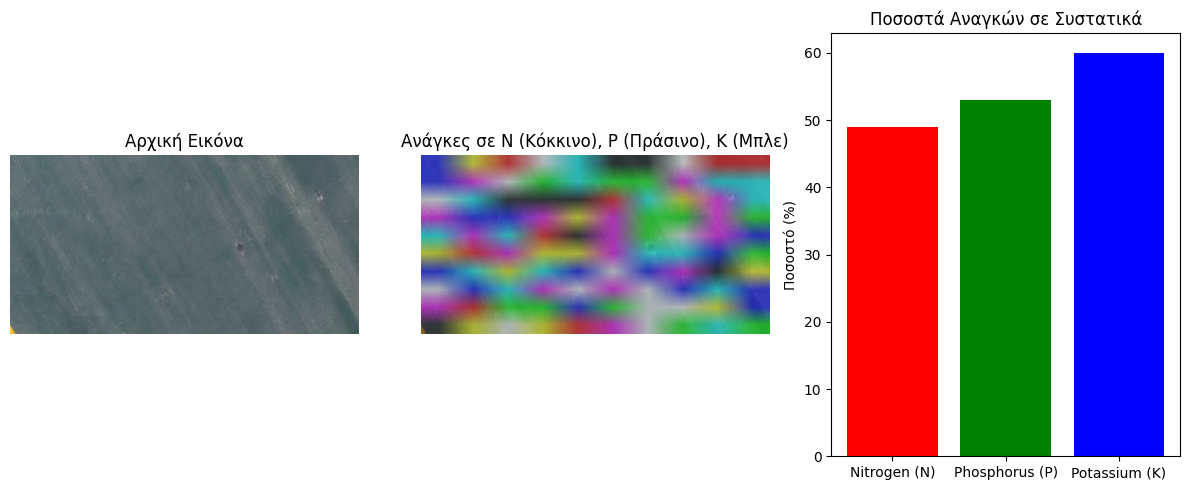

In [9]:
# Απαιτούμενες βιβλιοθήκες
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Διαδρομές αρχείων
image_path = '/content/drive/MyDrive/Python Projects/agro.png'
nitrogen_results_path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/results_nitrogen.csv'
phosphorus_results_path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/results_phosphorus.csv'
potassium_results_path = '/content/drive/MyDrive/Python Projects/AgroPredict AI/results_potassium.csv'

# Φόρτωση εικόνας αγροτεμαχίου
field_image = cv2.imread(image_path)
field_image_rgb = cv2.cvtColor(field_image, cv2.COLOR_BGR2RGB)

# Προσομοίωση δεδομένων (αντικαταστήστε με τα πραγματικά δεδομένα σας)
grid_size = (10, 10)  # Διάσταση grid
num_cells = grid_size[0] * grid_size[1]

# Τυχαία δεδομένα πρόβλεψης (αντικαταστήστε με πραγματικά δεδομένα)
np.random.seed(42)
predicted_nitrogen = np.random.uniform(10, 200, num_cells).reshape(grid_size)
predicted_phosphorus = np.random.uniform(5, 100, num_cells).reshape(grid_size)
predicted_potassium = np.random.uniform(10, 150, num_cells).reshape(grid_size)

# Δημιουργία μάσκας για κάθε στοιχείο
height, width, _ = field_image.shape
overlay_nitrogen = cv2.resize((predicted_nitrogen > 100).astype(np.uint8) * 255, (width, height))
overlay_phosphorus = cv2.resize((predicted_phosphorus > 50).astype(np.uint8) * 255, (width, height))
overlay_potassium = cv2.resize((predicted_potassium > 75).astype(np.uint8) * 255, (width, height))

# Μάσκα χρωμάτων (χωρίς ανάμιξη)
final_overlay = np.zeros((height, width, 3), dtype=np.uint8)
final_overlay[..., 0] = overlay_nitrogen  # Red για N
final_overlay[..., 1] = overlay_phosphorus  # Green για P
final_overlay[..., 2] = overlay_potassium  # Blue για K

# Συνδυασμός με την αρχική εικόνα
field_with_overlay = cv2.addWeighted(field_image_rgb, 0.5, final_overlay, 0.5, 0)

# Υπολογισμός ποσοστών αναγκών
total_cells = grid_size[0] * grid_size[1]
percentage_n = np.sum(predicted_nitrogen > 100) / total_cells * 100
percentage_p = np.sum(predicted_phosphorus > 50) / total_cells * 100
percentage_k = np.sum(predicted_potassium > 75) / total_cells * 100

# Δημιουργία ραβδογράμματος
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(field_image_rgb)
plt.title("Αρχική Εικόνα")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(field_with_overlay)
plt.title("Ανάγκες σε N (Κόκκινο), P (Πράσινο), K (Μπλε)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.bar(['Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)'],
        [percentage_n, percentage_p, percentage_k], color=['red', 'green', 'blue'])
plt.title("Ποσοστά Αναγκών σε Συστατικά")
plt.ylabel("Ποσοστό (%)")

plt.tight_layout()
plt.show()
